## 4.2 PPP and knockouts

In this document, we are looking at the phenotypic phase plane (PPP) of the model with the heterologous pathway and select knock-outs from literature. We are starting with just the basic model.

In [1]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

from cobra.flux_analysis.phenotype_phase_plane import production_envelope, add_envelope
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
model = read_sbml_model('data/yeastGEM_het.xml')

### Knockout-less phenotype phase plane analysis

In [3]:
# In this plot, we are looking at the dynamics between the 7-dehydrocholesterol creating reaction (R07215) and the biomass formation reaction (r_2111)
ppp_7DH = production_envelope(model,
                    reactions=[model.reactions.R07215],
                    objective=model.reactions.r_2111)

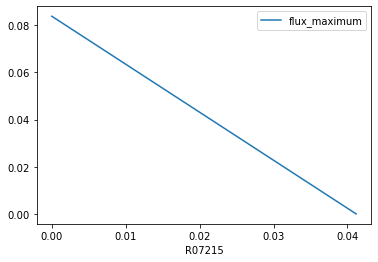

In [4]:
pppp = ppp_7DH.plot(x='R07215', y='flux_maximum')
fig = pppp.get_figure()
fig.savefig("figures/initial_ppp")

From this plot, we can see that there is a direct trade-off between production of the target compound and growth.

### Knockout of the YMR015C gene
We can now begin to knock out genes and testing for growth and production of 7-dehydrocholesterol. We are investigating for both maximal growth rate and 7-dehydrocholesterol production rate, but we are also interested in the PPP of the knockouts. 

These knockouts are based on literature research [29] or [11]=????.

We are starting with the ERG5 gene, which is called YMR015C in this model.

Maximal growth rate:
0.08374775717449129
Maximal 7-dehydrocholesterol production rate
0.04117342484804861


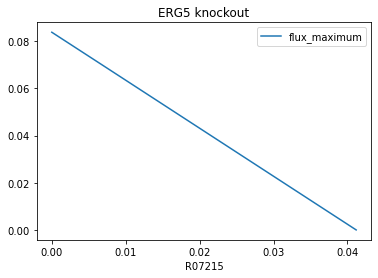

In [5]:
with model as des_mutant:
    des_mutant.genes.YMR015C.knock_out()
    
    print("Maximal growth rate:")
    print(des_mutant.slim_optimize())
    des_mutant.objective = model.reactions.R07215
    print("Maximal 7-dehydrocholesterol production rate")
    print(des_mutant.slim_optimize())
    
# We can now investigate the PPP between the 7-dehydrocholesterol creating reaction (R07215) and the biomass formation reaction (r_2111)
    ppp_7DH = production_envelope(des_mutant,
                    reactions=[des_mutant.reactions.R07215],
                    objective=des_mutant.reactions.r_2111)
    pppp = ppp_7DH.plot(x='R07215', y='flux_maximum')
    fig = pppp.get_figure()
    plt.title(label="ERG5 knockout")
    fig.savefig("figures/ERG5_knockout")

### Knockout of GAL genes
Next, we are trying to knock out the GAL7,1,10 genes [11]. In this model, they are called YBR018C, YBR019C, and YBR020W, respectively. We can now try to knock out these genes and investigate the PPP. 

Maximal growth rate:
0.08374778664999892
Maximal 7-dehydrocholesterol production rate
0.04117342484804859


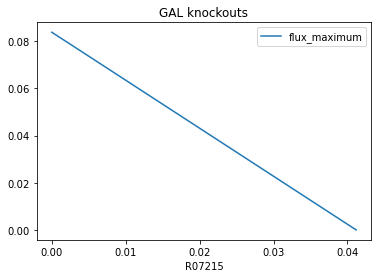

In [6]:
with model as GAL_mutant:
    GAL_mutant.genes.YBR018C.knock_out()
    GAL_mutant.genes.YBR019C.knock_out()
    GAL_mutant.genes.YBR020W.knock_out()
    
    print("Maximal growth rate:")       
    print(GAL_mutant.slim_optimize())
    des_mutant.objective = model.reactions.R07215
    print("Maximal 7-dehydrocholesterol production rate")
    print(des_mutant.slim_optimize())
    
# We can now investigate the PPP between the 7-dehydrocholesterol creating reaction (R07215) and the biomass formation reaction (r_2111)
    ppp_7DH = production_envelope(GAL_mutant,
                    reactions=[GAL_mutant.reactions.R07215],
                    objective=GAL_mutant.reactions.r_2111)
    pppp = ppp_7DH.plot(x='R07215', y='flux_maximum')
    fig = pppp.get_figure()
    plt.title(label="GAL knockouts")
    fig.savefig("figures/GAL_knockout")

### Knockout of the ERG6 gene
We can now investigate the ERG6 gene, which is responsible for converting zymosterol to fecosterol. In [11], this led to increased 7-dehydrocholesterol production, so we can try to see what effect this will have in our model.
In this model, the ERG6 gene is called YML008C and can now be knocked out.

Maximal growth rate:
0.08374775717449241
Maximal 7-dehydrocholesterol production rate
0.04117342484804947


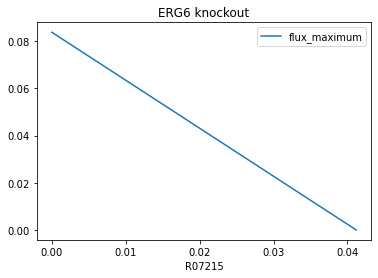

In [7]:
with model as feco_mutant:
    feco_mutant.genes.YML008C.knock_out()
    
    print("Maximal growth rate:")  
    print(feco_mutant.slim_optimize())
    feco_mutant.objective = model.reactions.R07215
    print("Maximal 7-dehydrocholesterol production rate")
    print(feco_mutant.slim_optimize())
    
# We can now investigate the PPP between the 7-dehydrocholesterol creating reaction (R07215) and the biomass formation reaction (r_2111)
    ppp_7DH = production_envelope(feco_mutant,
                    reactions=[feco_mutant.reactions.R07215],
                    objective=feco_mutant.reactions.r_2111)
    pppp = ppp_7DH.plot(x='R07215', y='flux_maximum')
    fig = pppp.get_figure()
    plt.title(label="ERG6 knockout")
    fig.savefig("figures/ERG6_knockout")

### Knockout combinations
Lastly, we can try to combine the GAL knockouts with the ERG6 knockout.

Maximal growth rate:
0.0837477571744908
Maximal 7-dehydrocholesterol production rate
0.04117342484804832


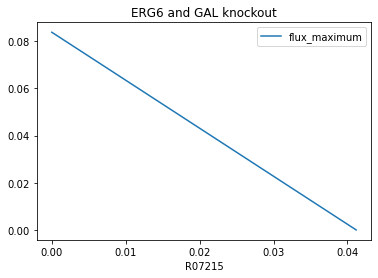

In [8]:
#When we combine the GAL and feco knockouts
with model as GAL_feco_mutant:
    GAL_feco_mutant.genes.YBR018C.knock_out()
    GAL_feco_mutant.genes.YBR019C.knock_out()
    GAL_feco_mutant.genes.YBR020W.knock_out()
    GAL_feco_mutant.genes.YML008C.knock_out()
    
    print("Maximal growth rate:")  
    print(GAL_feco_mutant.slim_optimize())
    GAL_feco_mutant.objective = model.reactions.R07215
    print("Maximal 7-dehydrocholesterol production rate")
    print(GAL_feco_mutant.slim_optimize())
    
    # We can now investigate the PPP between the 7-dehydrocholesterol creating reaction (R07215) and the biomass formation reaction (r_2111)
    ppp_7DH = production_envelope(feco_mutant,
                    reactions=[feco_mutant.reactions.R07215],
                    objective=feco_mutant.reactions.r_2111)
    pppp = ppp_7DH.plot(x='R07215', y='flux_maximum')
    fig = pppp.get_figure()
    plt.title(label="ERG6 and GAL knockout")
    fig.savefig("figures/GAL_ERG6_knockout")

### Conclusion
In conclusion,  we see some differences in the growth rate and the production of our product when we try the different knockouts, but this is quite marginal.

Thus, we will keep the model as-is.